In [1]:
import turicreate

In [3]:
sales = turicreate.SFrame("Philadelphia_Crime_Rate_noNA.csv")

Read 99 lines. Lines per second: 2137.21

Finished parsing file /home/po/projects/machine_Learning_Algorithms_python/regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.046449 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/po/projects/machine_Learning_Algorithms_python/regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.040546 secs.

In [4]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [7]:
turicreate.show(sales['CrimeRate'],sales['HousePrice'],xlabel="crime_rate", ylabel="housePrice")

Materializing X axis SArray

Materializing Y axis SArray

In [29]:
crime_model = turicreate.linear_regression.create(sales, target="HousePrice", features=["CrimeRate"])

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.006212     | 314982.574662      | 83468.940148                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

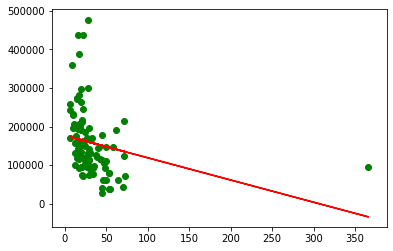

In [20]:
# ploating the predicted data
import matplotlib.pyplot as plt

plt.plot(sales['CrimeRate'],crime_model.predict(sales), color='red')
plt.scatter(sales['CrimeRate'],sales['HousePrice'], color='green')

In [21]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [25]:
turicreate.show(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [30]:
crime_modelCC = turicreate.linear_regression.create(sales_noCC, target="HousePrice", features=["CrimeRate"])

Linear regression:

--------------------------------------------------------

Number of examples          : 98

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.001399     | 315335.534886      | 78052.676125                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

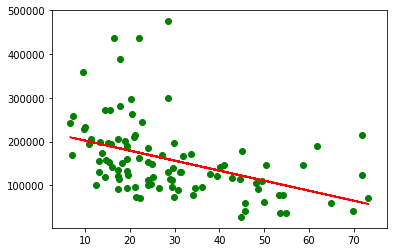

In [33]:
plt.plot(sales_noCC['CrimeRate'],crime_modelCC.predict(sales_noCC), color='red')
plt.scatter(sales_noCC['CrimeRate'],sales_noCC['HousePrice'], color='green')

In [34]:
# getting the coefficients
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


In [35]:
crime_model.convergence_threshold

0.01

In [36]:
crime_modelCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [38]:
# removing data which is beeing priced high
sales_noCC = sales_noCC[sales_noCC['HousePrice'] < 350000]

In [39]:
# recreating the model
crime_modelCC = turicreate.linear_regression.create(sales_noCC, target="HousePrice", features=["CrimeRate"])

Linear regression:

--------------------------------------------------------

Number of examples          : 93

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000952     | 153105.996748      | 54958.023447                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

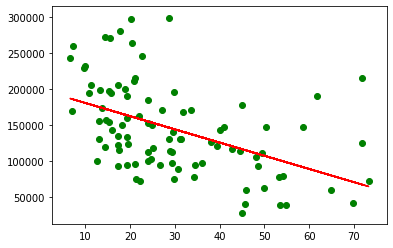

In [40]:
plt.plot(sales_noCC['CrimeRate'],crime_modelCC.predict(sales_noCC), color='red')
plt.scatter(sales_noCC['CrimeRate'],sales_noCC['HousePrice'], color='green')